<h1 align="center"><font color="yellow">HOW TO USE TENSORBOARD WITH PYTORCH</font></h1>

<font color="yellow">Data Scientist.: PhD.Eddy Giusepe Chirinos Isidro</font>

Links de estudo:

* [Tensorboard com Pytorch](https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html)

* [Tensorboard.dev](https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/tbdev_getting_started.ipynb)

* [A Complete Guide to Using TensorBoard with Pytorch](https://towardsdatascience.com/a-complete-guide-to-using-tensorboard-with-pytorch-53cb2301e8c3)

* [How to use TensorBoard with Pytorch](https://www.youtube.com/watch?v=OAJ3K1WgfnU)


# Contextualizando

O `TensorBoard` é um kit de ferramentas de visualização para experimentação de aprendizado de máquina. O `TensorBoard` permite rastrear (tracking) e visualizar métricas como `Loss` e `accuracy`, visualizar o gráfico do modelo, visualizar `histogramas`, exibir imagens e muito mais. Neste tutorial, abordaremos a instalação do `TensorBoard`, o uso básico com o `PyTorch` e como visualizar os dados registrados na `IU do TensorBoard`.

<font color="pink">Instalação:</font>

O PyTorch deve ser instalado para registrar modelos e métricas no diretório de log do TensorBoard. 

```
$ conda install pytorch torchvision -c pytorch
```
ou
```
$ pip install torch torchvision
```



# Usando o TensorBoard no PyTorch

Vamos agora tentar usar o `TensorBoard` com o `PyTorch!` Antes de registrar qualquer coisa, precisamos criar uma instância `SummaryWriter`.


In [1]:
import torch

from torch.utils.tensorboard import SummaryWriter

# O Writer enviará para o diretório ./runs/ por padrão.
writer = SummaryWriter()


# Log scalars

Em Machine Learning, é importante entender as principais métricas, como `Loss` e como elas mudam durante o treinamento. `Scalar` ajuda a salvar o valor da Loss de cada etapa de treinamento ou a accuracy após cada época.

Para registrar um valor scalar, use `add_scalar(tag, scalar_value, global_step=None, walltime=None)`. <font color="red">Por exemplo:</font> vamos criar um treinamento de `Regressão Linear simples` e registrar o valor da Loss usando `add_scalar`.

In [3]:
import torch

from torch.utils.tensorboard import SummaryWriter

# O Writer enviará para o diretório ./runs/ por padrão.
writer = SummaryWriter()


x = torch.arange(-5, 5, 0.1).view(-1, 1) # torch.arange(-5, 5, 0.1) --> Tensor Unidimensional. view(-1, 1) --> Redimensiona a um Tensor coluna e um número de linhas desconhecido.
y = -5 * x + 0.1 * torch.randn(x.size()) # Função Linear com ruído. 'x' e 'y' Têm o mesmo tamanho.


model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)


def calculate_accuracy(y1, y):
    predicted = y1.round()
    correct = (predicted == y).sum().item()
    total = y.size(0)
    accuracy = correct / total
    return accuracy

def train_model(iter):
    for epoch in range(iter):
        y1 = model(x) # Minhas previsões
        loss = criterion(y1, y) # y -->  Rótulos verdadeiros
        accuracy = calculate_accuracy(y1, y)
        writer.add_scalar("Loss/train", loss, epoch)
        writer.add_scalar("Accuracy/train", accuracy, epoch)

        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

train_model(20)

writer.flush() # Forçar a gravação de dados.
writer.close()


In [4]:
x.shape

torch.Size([100, 1])

In [5]:
y.shape

torch.Size([100, 1])

Chame o método `flush()` para garantir que todos os eventos pendentes tenham sido gravados no disco.

Consulte os [tutoriais do torch.utils.tensorboard](https://pytorch.org/docs/stable/tensorboard.html) para encontrar mais tipos de visualização do TensorBoard que você pode registrar.

Se você não precisar mais do `summary writer`, chame o método `close()`.

In [6]:
writer.close()

# Executar TensorBoard

<font color="orange">Instale o `TensorBoard` por meio da linha de comando para visualizar os dados que você registrou:</font>

```
$ pip install tensorboard
```

<font color="orange">Agora, inicie o `TensorBoard`, especificando o diretório de log raiz que você usou acima. O argumento `logdir` aponta para o diretório onde o `TensorBoard` procurará para encontrar os arquivos de evento que podem ser exibidos. O TensorBoard percorrerá recursivamente a estrutura de diretório com raiz em `logdir`, procurando por arquivos `.*tfevents.*`.</font>


```
%load_ext tensorboard

%tensorboard --logdir=runs

```
ou
```
%load_ext tensorboard

%tensorboard --logdir /home/eddygiusepe/1_Eddy_Giusepe/LightningAI/Tensorboard_1/runs
```


In [ ]:
%load_ext tensorboard

%tensorboard --logdir=runs

Para acessar ao Tensorboard, vai na seguinte URL: [http://localhost:6006/](http://localhost:6006/)

<font color="orange">Este painel mostra como a `Loss` e a `Accuracy` mudam a cada época. Você também pode usá-lo para rastrear `velocidade de Treinamento`, taxa de aprendizado (`Learning rate`) e outros valores escalares. É útil comparar essas métricas em diferentes execuções de treinamento para melhorar seu modelo.</font>

<font color="red">Mais um exemplo com Tensorboard</font> e com dados de teste.

In [1]:
import torch
from torch.utils.tensorboard import SummaryWriter

# O Writer enviará para o diretório ./runs/ por padrão.
writer = SummaryWriter()

# Dados de treinamento
x_train = torch.arange(-5, 5, 0.1).view(-1, 1)
y_train = -5 * x_train + 0.1 * torch.randn(x_train.size())

# Dados de teste
x_test = torch.arange(-5, 5, 0.2).view(-1, 1)
y_test = -5 * x_test

model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

def calculate_accuracy(y1, y):
    predicted = y1.round()
    correct = (predicted == y).sum().item()
    total = y.size(0)
    accuracy = (correct / total) * 100
    return accuracy

def train_model(iter):
    for epoch in range(iter):
        model.train()
        y1 = model(x_train)
        loss = criterion(y1, y_train)
        accuracy = calculate_accuracy(y1, y_train)
        writer.add_scalar("Loss/train", loss, epoch)
        writer.add_scalar("Accuracy/train", accuracy, epoch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        model.eval()
        with torch.no_grad():
            y1_test = model(x_test)
            test_loss = criterion(y1_test, y_test)
            test_accuracy = calculate_accuracy(y1_test, y_test)
            writer.add_scalar("Loss/test", test_loss, epoch)
            writer.add_scalar("Accuracy/test", test_accuracy, epoch)

train_model(50)

writer.flush()  # Forçar a gravação de dados.
writer.close()


In [ ]:
%load_ext tensorboard

%tensorboard --logdir=runs

<font color="pink">Mais outro exemplo com Tensorboard</font>, com dados de Train, Val e test.

In [4]:
import torch
from torch.utils.tensorboard import SummaryWriter

# O Writer enviará para o diretório ./runs/ por padrão.
writer = SummaryWriter()

# Dados de treinamento
x_train = torch.arange(-5, 5, 0.1).view(-1, 1)
y_train = -5 * x_train + 0.1 * torch.randn(x_train.size())

# Dados de validação
x_val = torch.arange(-5, 5, 0.2).view(-1, 1)
y_val = -5 * x_val + 0.1 * torch.randn(x_val.size())

# Dados de teste
x_test = torch.arange(-5, 5, 0.2).view(-1, 1)
y_test = -5 * x_test

model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

def calculate_accuracy(y1, y):
    predicted = y1.round()
    correct = (predicted == y).sum().item()
    total = y.size(0)
    accuracy = (correct / total) * 100
    return accuracy

def train_model(iter):
    best_val_loss = float('inf')  # Para acompanhar a melhor perda de validação
    for epoch in range(iter):
        model.train()
        y1_train = model(x_train)
        loss_train = criterion(y1_train, y_train)
        accuracy_train = calculate_accuracy(y1_train, y_train)
        writer.add_scalar("Loss/train", loss_train, epoch)
        writer.add_scalar("Accuracy/train", accuracy_train, epoch)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        model.eval()
        with torch.no_grad():
            y1_val = model(x_val)
            loss_val = criterion(y1_val, y_val)
            accuracy_val = calculate_accuracy(y1_val, y_val)
            writer.add_scalar("Loss/val", loss_val, epoch)
            writer.add_scalar("Accuracy/val", accuracy_val, epoch)
            
            # Verificar se a perda de validação atual é a melhor até agora
            if loss_val < best_val_loss:
                best_val_loss = loss_val
                # Salvar o modelo atual como o melhor modelo
                torch.save(model.state_dict(), 'best_model.pt')

    # Carregar o melhor modelo treinado
    model.load_state_dict(torch.load('best_model.pt'))

    # Avaliar o modelo no conjunto de teste
    model.eval()
    with torch.no_grad():
        y1_test = model(x_test)
        loss_test = criterion(y1_test, y_test)
        accuracy_test = calculate_accuracy(y1_test, y_test)
        writer.add_scalar("Loss/test", loss_test, epoch)
        writer.add_scalar("Accuracy/test", accuracy_test, epoch)

train_model(60)

writer.flush()  # Forçar a gravação de dados.
writer.close()


In [ ]:
%load_ext tensorboard

%tensorboard --logdir=runs


# Compartilhar painéis do TensorBoard

O [TensorBoard.dev](https://tensorboard.dev/) permite que você carregue e compartilhe os resultados de seus experimentos de ML com qualquer pessoa. Use `TensorBoard.dev` para hospedar, rastrear e compartilhar seus painéis do TensorBoard.

Instale a versão mais recente do TensorBoard para usar o `uploader`.


```
pip install tensorboard --upgrade
```
Use um comando simples para carregar e compartilhar seu `TensorBoard`.


```
tensorboard dev upload --logdir runs \
--name "Meu último experimento: EddyGiusepe_DeepLearning" \ # optional
--description "Modelo simples de Deep Learning" # optional
```


<font color="orange">Para obter ajuda, execute: `$ tensorboard dev --help`.</font>


<font color="red">Observação:</font> 

os `TensorBoards` carregados são públicos e visíveis para todos. Não carregue dados confidenciais.

Visualize seu `TensorBoard` ao vivo na URL fornecido em seu terminal. Por exemplo: [https://tensorboard.dev/experiment/AdYd1TgeTlaLWXx6I8JUbA](https://tensorboard.dev/experiment/AdYd1TgeTlaLWXx6I8JUbA).


<font color="orange">Para nosso caso podemos digitar no browser o seguinte (ver os prints abaixo, também):</font> [https://tensorboard.dev/experiments/](https://tensorboard.dev/experiments/).

In [ ]:
# Vou tentar compartilhar meu Treinamento:
%load_ext tensorboard

# Executando a seguinte linha, você vai visualizar o tensorboard.dev no browser:
%tensorboard dev upload --logdir runs --name "Meu Modelo Eddy_DeepLearning" --description "Exemplo simples" 


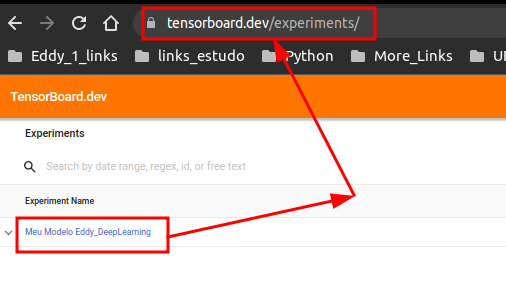

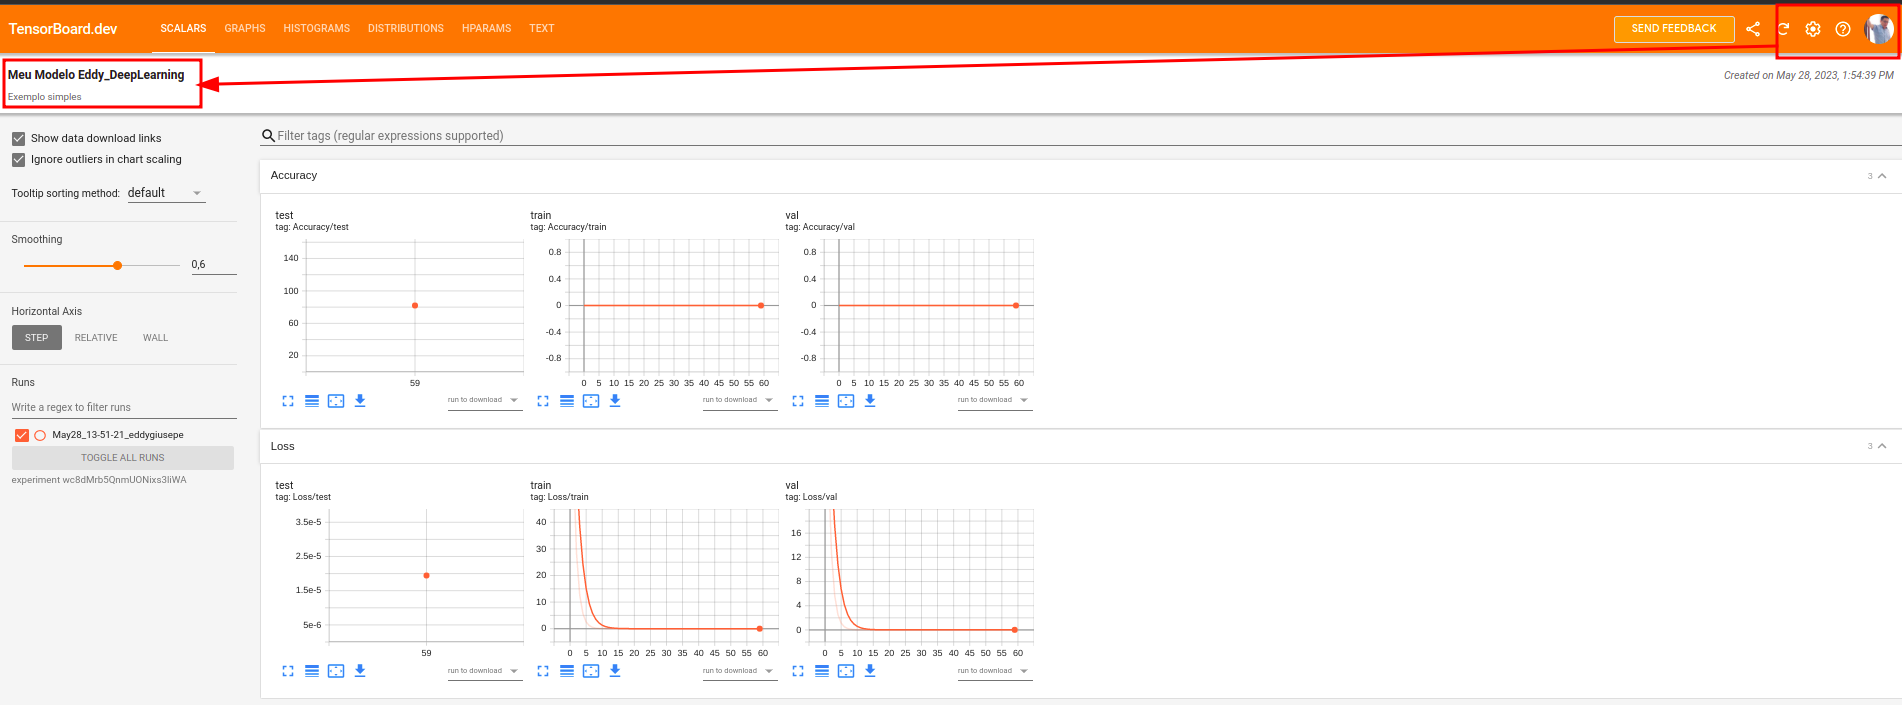

<font color="yellow">Nota:</font>

`TensorBoard.dev` atualmente suporta `scalars`, `graphs`, `histograms`, `distributions`, `hparams` e `painéis de texto` (text dashboards).


Ler mais:

* [torch.utils.tensorboard](https://pytorch.org/docs/stable/tensorboard.html)